In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))                                       ; print(input_img.shape) 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)       ; print(x.shape)
x = MaxPooling2D((2, 2), padding='same')(x)                                ; print(x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)                ; print(x.shape)
x = MaxPooling2D((2, 2), padding='same')(x)                                ; print(x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)                ; print(x.shape)
encoded = MaxPooling2D((2, 2), padding='same')(x)                          ; print(encoded.shape)

print("middle")# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)          ; print(x.shape)
x = UpSampling2D((2, 2))(x)                                                ; print(x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)                ; print(x.shape)
x = UpSampling2D((2, 2))(x)                                                ; print(x.shape)
x = Conv2D(16, (3, 3), activation='relu')(x)                               ; print(x.shape)
x = UpSampling2D((2, 2))(x)                                                ; print(x.shape)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)       ; print(decoded.shape)

autoencoder = Model(input_img, decoded)

from keras import optimizers
opt = optimizers.Adadelta(lr=0.1)
autoencoder.compile(optimizer=opt, loss='mean_squared_error')

Using TensorFlow backend.


(?, 28, 28, 1)
(?, 28, 28, 16)
(?, 14, 14, 16)
(?, 14, 14, 8)
(?, 7, 7, 8)
(?, 7, 7, 8)
(?, 4, 4, 8)
middle
(?, 4, 4, 8)
(?, 8, 8, 8)
(?, 8, 8, 8)
(?, 16, 16, 8)
(?, 14, 14, 16)
(?, 28, 28, 16)
(?, 28, 28, 1)


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [3]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='D:\\Python\\Autoencoder_keras\\log')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s - loss: 0.1334 - val_loss: 0.0972s:
Epoch 2/50
60000/60000 [==============================] - 10s - loss: 0.0661 - val_loss: 0.0567
Epoch 3/50
60000/60000 [==============================] - 10s - loss: 0.0517 - val_loss: 0.0477
Epoch 4/50
60000/60000 [==============================] - 9s - loss: 0.0455 - val_loss: 0.0435
Epoch 5/50
60000/60000 [==============================] - 8s - loss: 0.0423 - val_loss: 0.0408
Epoch 6/50
41600/60000 [===================>..........] - ETA: 2s - loss: 0.0403

KeyboardInterrupt: 

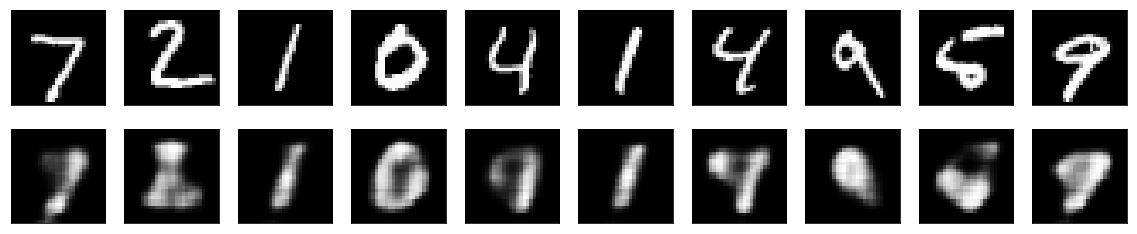

In [4]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, 1+i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()